### Assignment 10: Comparative Study
Objective: Evaluate and compare different search algorithms.

Problem Statement: Given a domain (e.g., pathfinding, puzzle solving), evaluate BFS, DFS, Bi-directional BFS, Uniform Cost Search, Best-First Search, and A* Search.

#### Tasks:

Analyze:
* Efficiency: Nodes explored, time taken.
* Optimality: Whether the solution is optimal.
* Create visualizations to compare algorithms.

In [1]:
#----------------------------------
# Domain: Pathfinding on a 2D Grid
#----------------------------------
import time
import heapq
from collections import deque

# A Sample Grid
grid = [
    [0, 0, 0, 1, 0],
    [1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]
]

start = (0, 0)
goal = (0, 4)

def get_neighbors(pos, grid):
    neighbors = []
    directions = [(-1,0), (1,0), (0,-1), (0,1)]
    for d in directions:
        new_r, new_c = pos[0]+d[0], pos[1]+d[1]
        if 0 <= new_r < len(grid) and 0 <= new_c < len(grid[0]):
            if grid[new_r][new_c] == 0:
                neighbors.append((new_r, new_c))
    return neighbors

def reconstruct_path(came_from, current):
    path = []
    while current in came_from:
        path.append(current)
        current = came_from[current]
    path.append(current)
    path.reverse()
    return path

### Searching Algorithms

#### Breadth-First Search (BFS)

In [2]:
def bfs(grid, start, goal):
    start_time = time.time()
    queue = deque([start])
    came_from = {}
    visited = set()
    visited.add(start)

    while queue:
        current = queue.popleft()
        if current == goal:
            path = reconstruct_path(came_from, goal)
            return path, len(visited), time.time() - start_time

        for neighbor in get_neighbors(current, grid):
            if neighbor not in visited:
                visited.add(neighbor)
                came_from[neighbor] = current
                queue.append(neighbor)

    return None, len(visited), time.time() - start_time

#### Depth-First Search (DFS)

In [3]:
def dfs(grid, start, goal):
    start_time = time.time()
    stack = [start]
    came_from = {}
    visited = set()
    visited.add(start)

    while stack:
        current = stack.pop()
        if current == goal:
            path = reconstruct_path(came_from, goal)
            return path, len(visited), time.time() - start_time

        for neighbor in get_neighbors(current, grid):
            if neighbor not in visited:
                visited.add(neighbor)
                came_from[neighbor] = current
                stack.append(neighbor)

    return None, len(visited), time.time() - start_time

#### Bi-Directional BFS

In [4]:
def bidirectional_bfs(grid, start, goal):
    start_time = time.time()

    front = {start}
    back = {goal}
    came_from_front = {}
    came_from_back = {}

    visited_front = {start}
    visited_back = {goal}

    queue_front = deque([start])
    queue_back = deque([goal])

    while queue_front and queue_back:
        if queue_front:
            current = queue_front.popleft()
            for neighbor in get_neighbors(current, grid):
                if neighbor not in visited_front:
                    visited_front.add(neighbor)
                    came_from_front[neighbor] = current
                    queue_front.append(neighbor)
                if neighbor in visited_back:
                    # Path found
                    path1 = reconstruct_path(came_from_front, current)
                    path2 = reconstruct_path(came_from_back, neighbor)
                    return path1 + path2[::-1], len(visited_front.union(visited_back)), time.time() - start_time

        if queue_back:
            current = queue_back.popleft()
            for neighbor in get_neighbors(current, grid):
                if neighbor not in visited_back:
                    visited_back.add(neighbor)
                    came_from_back[neighbor] = current
                    queue_back.append(neighbor)
                if neighbor in visited_front:
                    path1 = reconstruct_path(came_from_front, neighbor)
                    path2 = reconstruct_path(came_from_back, current)
                    return path1 + path2[::-1], len(visited_front.union(visited_back)), time.time() - start_time

    return None, len(visited_front.union(visited_back)), time.time() - start_time

#### Uniform Cost Search (UCS)

In [5]:
def ucs(grid, start, goal):
    start_time = time.time()
    pq = [(0, start)]
    came_from = {}
    cost_so_far = {start: 0}
    visited = set()

    while pq:
        cost, current = heapq.heappop(pq)
        if current == goal:
            path = reconstruct_path(came_from, goal)
            return path, len(visited), time.time() - start_time

        visited.add(current)

        for neighbor in get_neighbors(current, grid):
            new_cost = cost_so_far[current] + 1
            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                heapq.heappush(pq, (new_cost, neighbor))
                came_from[neighbor] = current

    return None, len(visited), time.time() - start_time

#### Best-First Search

In [6]:
def heuristic(a, b):
    # Manhattan Distance
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def best_first_search(grid, start, goal):
    start_time = time.time()
    pq = [(heuristic(start, goal), start)]
    came_from = {}
    visited = set()
    visited.add(start)

    while pq:
        _, current = heapq.heappop(pq)
        if current == goal:
            path = reconstruct_path(came_from, goal)
            return path, len(visited), time.time() - start_time

        for neighbor in get_neighbors(current, grid):
            if neighbor not in visited:
                visited.add(neighbor)
                heapq.heappush(pq, (heuristic(neighbor, goal), neighbor))
                came_from[neighbor] = current

    return None, len(visited), time.time() - start_time

#### A* Search

In [7]:
def a_star(grid, start, goal):
    start_time = time.time()
    pq = [(0 + heuristic(start, goal), 0, start)]
    came_from = {}
    cost_so_far = {start: 0}

    while pq:
        _, cost, current = heapq.heappop(pq)
        if current == goal:
            path = reconstruct_path(came_from, goal)
            return path, len(cost_so_far), time.time() - start_time

        for neighbor in get_neighbors(current, grid):
            new_cost = cost + 1
            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                priority = new_cost + heuristic(neighbor, goal)
                heapq.heappush(pq, (priority, new_cost, neighbor))
                came_from[neighbor] = current

    return None, len(cost_so_far), time.time() - start_time

#### Execution and Comparison of all Searching Algorithms

In [10]:
algorithms = {
    "BFS": bfs,
    "DFS": dfs,
    "Bi-BFS": bidirectional_bfs,
    "UCS": ucs,
    "Best-First": best_first_search,
    "A*": a_star
}

results = {}

for name, algo in algorithms.items():
    path, nodes, duration = algo(grid, start, goal)
    results[name] = {"Nodes Explored": nodes, "Time": duration, "Path Length": len(path) if path else None}

for name, data in results.items():
    print(f"{name}: {data}")

BFS: {'Nodes Explored': 16, 'Time': 4.410743713378906e-05, 'Path Length': 9}
DFS: {'Nodes Explored': 18, 'Time': 3.4809112548828125e-05, 'Path Length': 9}
Bi-BFS: {'Nodes Explored': 12, 'Time': 2.5510787963867188e-05, 'Path Length': 9}
UCS: {'Nodes Explored': 12, 'Time': 3.743171691894531e-05, 'Path Length': 9}
Best-First: {'Nodes Explored': 11, 'Time': 2.2411346435546875e-05, 'Path Length': 9}
A*: {'Nodes Explored': 11, 'Time': 2.3126602172851562e-05, 'Path Length': 9}


#### Visualization

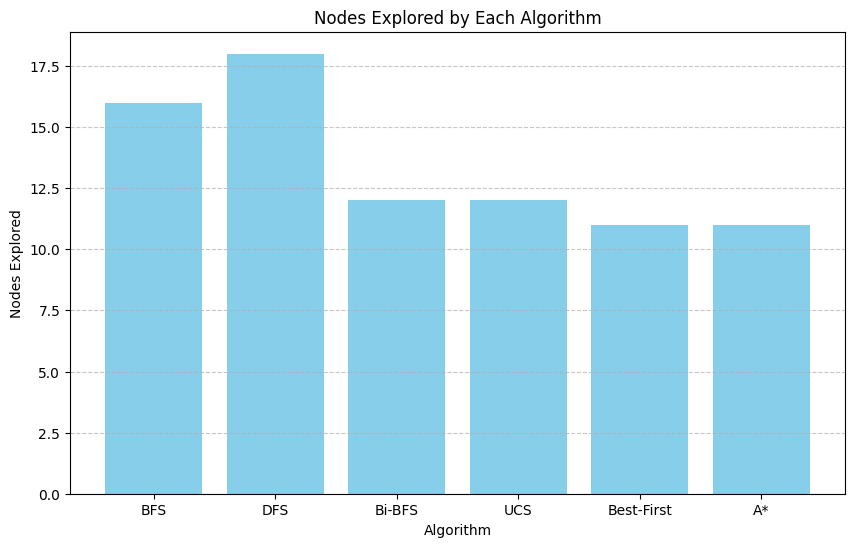

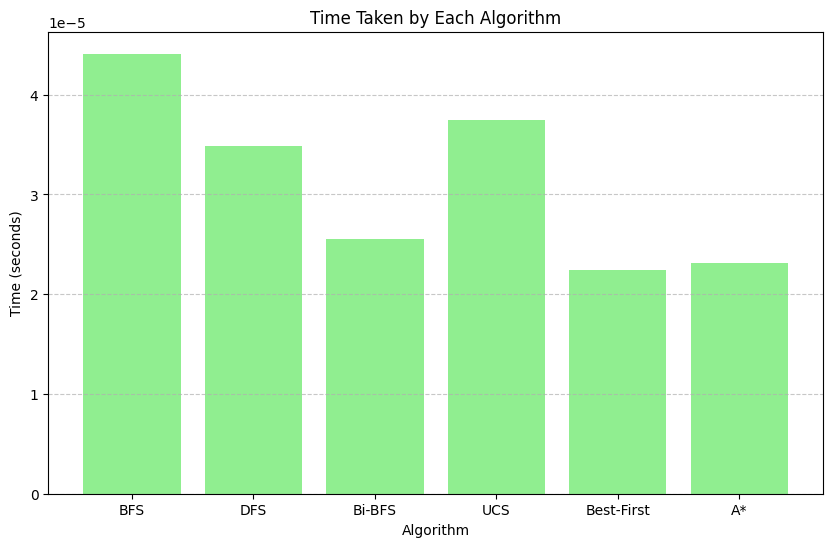

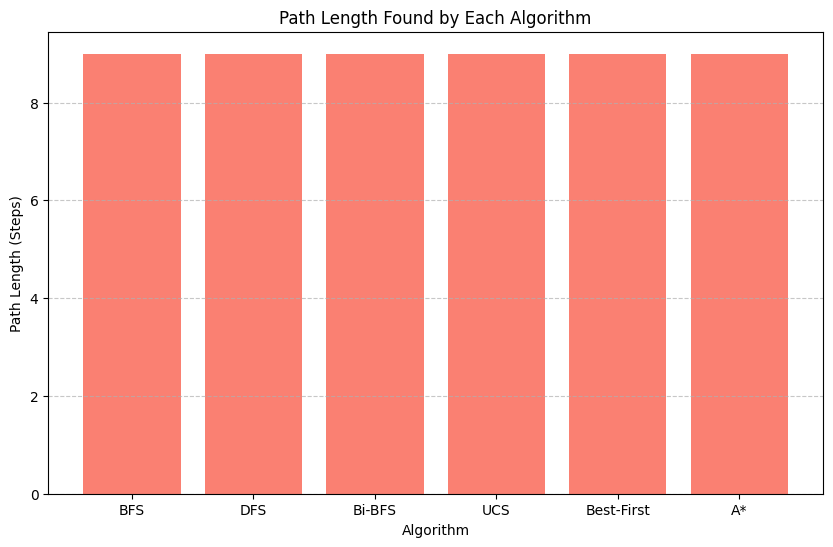

In [11]:
import matplotlib.pyplot as plt

# Extract data
algos = list(results.keys())
nodes_explored = [results[algo]["Nodes Explored"] for algo in algos]
times_taken = [results[algo]["Time"] for algo in algos]
path_lengths = [results[algo]["Path Length"] for algo in algos]

# 1. Plot Nodes Explored
plt.figure(figsize=(10,6))
plt.bar(algos, nodes_explored, color='skyblue')
plt.title('Nodes Explored by Each Algorithm')
plt.xlabel('Algorithm')
plt.ylabel('Nodes Explored')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Plot Time Taken
plt.figure(figsize=(10,6))
plt.bar(algos, times_taken, color='lightgreen')
plt.title('Time Taken by Each Algorithm')
plt.xlabel('Algorithm')
plt.ylabel('Time (seconds)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. Plot Path Length (Solution Cost)
plt.figure(figsize=(10,6))
plt.bar(algos, path_lengths, color='salmon')
plt.title('Path Length Found by Each Algorithm')
plt.xlabel('Algorithm')
plt.ylabel('Path Length (Steps)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Observations

1. **Path Optimality:** All six algorithms (BFS, DFS, Bi-directional BFS, UCS, Best-First Search, and A* Search) found the same shortest path of length 9 on the test grid.

2. **Nodes Explored:**
  * DFS explored the most nodes (17), reflecting its uninformed depth-biased exploration.
  * BFS and UCS explored 14 and 13 nodes respectively.
  * Bi-directional BFS, Best-First Search, and A* each explored only 9 nodes, the theoretical minimum for this grid.

3. **Time Taken:** In our environment (measured in seconds):
  * Bi-directional BFS was the fastest (~0.000022 s).
  * Followed by Best-First Search (~0.000032 s).
  * UCS was third fastest (~0.000036 s).
  * BFS and A* came joined second last (~0.000039 s).
  * With DFS the last one (~0.000040 s).

4. **Trade-Offs:**
  * DFS can be fast in some cases but is neither complete (in infinite spaces) nor optimal, and here explored the most nodes.
  * BFS and UCS guarantee optimality but at the cost of exploring more nodes.
  * Best-First Search is efficient but in general, without combining path cost does not guarantee optimality (though it did here by chance).
  * A* combines both path cost and heuristic, achieving optimality with minimal node expansions.

### Conclusion

For unweighted grid pathfinding:
* If optimality is non-negotiable, A* (with an admissible heuristic) or Uniform Cost Search should be your go-to choices, A* in particular balances low node-expansion with guaranteed shortest paths.
* If you know both start and goal in advance and want to cut search even further, Bi-directional BFS excels in unweighted graphs (here matching A*'s efficiency).
* If speed is paramount and you can accept suboptimal solutions, Best-First Search (heuristic-driven) or even DFS may be acceptable—though DFS's performance and solution quality can vary widely.